<a href="https://colab.research.google.com/github/shbnm93/Data-Science-Projects/blob/main/3_Zaman_Serisi_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install finta

In [2]:
## import necessary packages !
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from finta import TA
import yfinance as yf
plt.style.use(style='seaborn')
import xgboost as xgb

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
<ipython-input-2-16e5e81be451>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


In [3]:
df = pd.read_csv('WEAT ETF Stock Price History.csv')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [4]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-12-29,5.97,5.99,5.998,5.92,584.92K,-0.50%
2023-12-28,6.00,5.94,6.030,5.94,634.94K,1.18%
2023-12-27,5.93,5.97,5.990,5.91,764.65K,-1.66%
2023-12-26,6.03,5.86,6.060,5.83,1.06M,2.90%
2023-12-22,5.86,5.85,5.899,5.85,606.12K,0.17%


In [5]:
df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2014-01-28,13.74,14.01,14.01,13.70,6.46K,-0.79%
2014-01-27,13.85,14.19,14.19,13.63,32.25K,-0.86%
2014-01-24,13.97,14.03,14.03,13.80,48.43K,-0.92%
2014-01-23,14.10,14.68,14.68,14.02,26.31K,1.37%
2014-01-22,13.91,13.95,13.96,13.81,2.04K,-0.14%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2528 entries, 2023-12-29 to 2014-01-22
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2528 non-null   float64
 1   Open      2528 non-null   float64
 2   High      2528 non-null   float64
 3   Low       2528 non-null   float64
 4   Vol.      2503 non-null   object 
 5   Change %  2528 non-null   object 
dtypes: float64(4), object(2)
memory usage: 138.2+ KB


In [7]:
df.shape

(2528, 6)

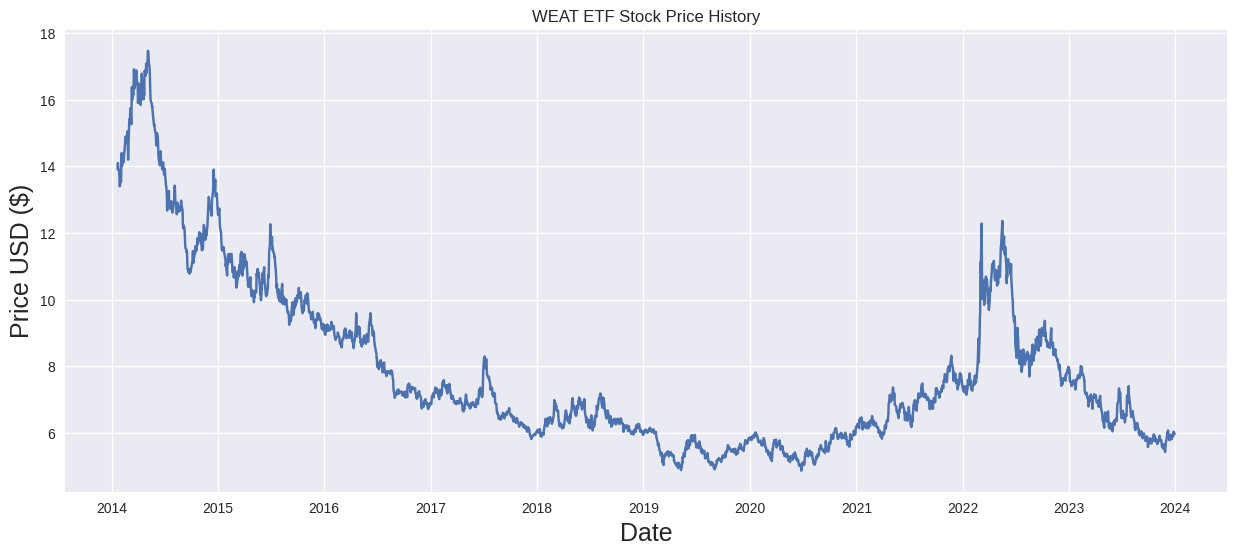

In [8]:
plt.figure(figsize=(15,6))
plt.title('WEAT ETF Stock Price History')
plt.plot(df['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.show()

In [9]:
df.index

DatetimeIndex(['2023-12-29', '2023-12-28', '2023-12-27', '2023-12-26',
               '2023-12-22', '2023-12-21', '2023-12-20', '2023-12-19',
               '2023-12-18', '2023-12-15',
               ...
               '2014-02-04', '2014-02-03', '2014-01-31', '2014-01-30',
               '2014-01-29', '2014-01-28', '2014-01-27', '2014-01-24',
               '2014-01-23', '2014-01-22'],
              dtype='datetime64[ns]', name='Date', length=2528, freq=None)

In [10]:
#create a new dataframe with only the 'price column'
data = df.filter(['Price'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2023

In [11]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.08802538],
       [0.09040444],
       [0.08485329],
       ...,
       [0.72244251],
       [0.73275178],
       [0.71768438]])

In [12]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []


for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.08802538, 0.09040444, 0.08485329, 0.09278351, 0.07930214,
       0.07850912, 0.07533703, 0.08326725, 0.08009516, 0.08564631,
       0.07850912, 0.07295797, 0.08485329, 0.07375099, 0.0888184 ,
       0.09595559, 0.0888184 , 0.09040444, 0.08485329, 0.07137193,
       0.07057891, 0.06264869, 0.05313243, 0.0444092 , 0.05471848,
       0.0630452 , 0.05947661, 0.05313243, 0.05630452, 0.05868358,
       0.06502776, 0.07137193, 0.07375099, 0.07137193, 0.0777161 ,
       0.08326725, 0.07137193, 0.07375099, 0.07216495, 0.06740682,
       0.06502776, 0.06344171, 0.06899286, 0.07454401, 0.07613006,
       0.06978588, 0.07533703, 0.08247423, 0.08009516, 0.08643933,
       0.07850912, 0.07137193, 0.07533703, 0.07533703, 0.07533703,
       0.06502776, 0.06819984, 0.07613006, 0.07375099, 0.07692308])]
[0.06502775574940517]

[array([0.08802538, 0.09040444, 0.08485329, 0.09278351, 0.07930214,
       0.07850912, 0.07533703, 0.08326725, 0.08009516, 0.08564631,
       0.07850912, 0.07295797, 0.08

In [13]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1963, 60, 1)

In [15]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1963/1963 [==============================] - 69s 33ms/step - loss: 7.8508e-04


In [18]:
#Create the testing data set
#Create a new array containing scaled values from index 1963 to 2023
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [19]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [20]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))